# Caroline's Boston PizzaTips

In [6]:
%matplotlib inline

import warnings
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.multicomp as posthoc
import matplotlib.pyplot as graph

warnings.simplefilter('ignore')
sns.set()

Prep Data

In [7]:
# Get data
column_names = ['#', 'Tips', 'Hours', 'Date', '?']
data = pd.read_csv('01-06-2016-tipsee-12-13.csv', header=-1)
data.columns = column_names

# Add Tips per hour column
data['Tips per Hour'] = data['Tips'] / data['Hours']

dates = pd.to_datetime(data['Date'])
data['Day'] = pd.to_datetime(data['Date']).dt.dayofweek

## Results

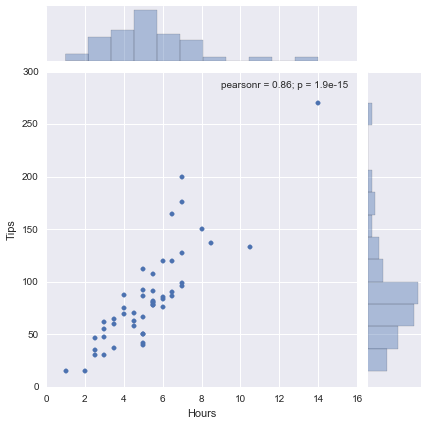

In [8]:
sns.jointplot(x='Hours', y='Tips', data=pd.DataFrame(data, columns=['Hours', 'Tips']))
graph.show()

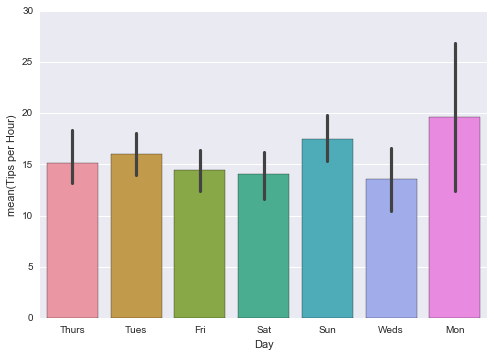

In [12]:
# Which day has the best tips per hour rate?
day_array = {0: 'Mon', 1: 'Tues', 2: 'Weds', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

bar_graph_data = pd.DataFrame(data, columns=['Day', 'Tips per Hour'])
bar_graph_data['Day'] = bar_graph_data['Day'].apply(lambda x: day_array[x])

sns.barplot(x='Day', y='Tips per Hour', data=bar_graph_data)
graph.ylabel('Tips / Hour')
graph.show()

In [10]:
# Run ANOVA with Post Hoc test to figure which day is significantly different
post_test = posthoc.MultiComparison(data=data['Tips per Hour'], groups=data['Day'])
posthoc_test = post_test.tukeyhsd()
print(posthoc_test)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  0      1    -3.6444  -11.393   4.1041 False 
  0      2    -6.1003  -17.7231  5.5225 False 
  0      3    -4.4735  -14.7239  5.7768 False 
  0      4    -5.1725  -13.3911  3.046  False 
  0      5    -5.5608  -13.5006  2.3791 False 
  0      6    -2.1383  -9.9744   5.6977 False 
  1      2    -2.4559  -12.7062  7.7945 False 
  1      3    -0.8291  -9.4922   7.834  False 
  1      4    -1.5281  -7.6538   4.5977 False 
  1      5    -1.9163  -7.6628   3.8301 False 
  1      6     1.5061  -4.0961   7.1083 False 
  2      3     1.6268  -10.6247 13.8783 False 
  2      4     0.9278  -9.6823  11.5379 False 
  2      5     0.5396  -9.8562  10.9353 False 
  2      6     3.962   -6.3547  14.2787 False 
  3      4     -0.699  -9.7849   8.387  False 
  3      5    -1.0872  -9.9219   7.7474 False 
  3      6     2.3352  -6.4063  11.0767 False 
  4      

# Conclusion

##### Looks like with the data we've got there's no reason to believe that's you make more tips/hour on a particular day. Sooo that was boring.